FWHM MSE:  17.827325912160056


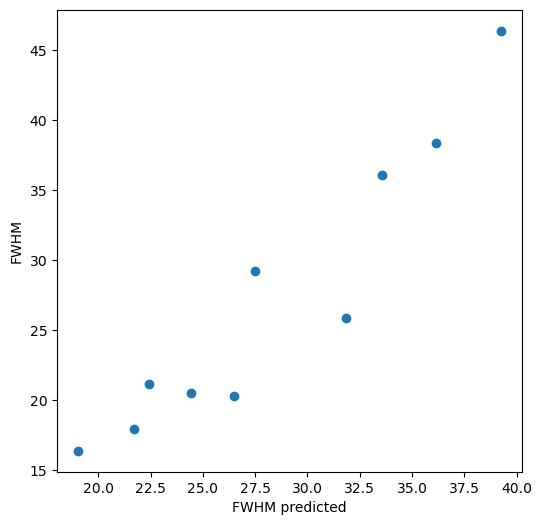

y = ax + b
(a = 1.4192903850475374, b = -12.855364091809957)


In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#filename = input('Enter filename\n')
filename = "omega-values.xlsx"
ans="FWHM"
drop=[ans]
test_size = 0.6

df = pd.read_excel(filename, index_col=0)
col=df.columns.drop(drop)

X, Y = df[col], df[ans]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=1) #X,YをAIに学習させるデータと、テスト用のデータに分ける

RF= RandomForestRegressor()
RF.fit(X_train, Y_train)
RF.fit(X, Y)

Y_test_pred  = RF.predict(X_test)

MSE=mean_squared_error(Y_test,Y_test_pred)
a,b=np.polyfit(Y_test_pred,Y_test,1) #linear approximation
print(ans+" MSE: ",MSE)


plt.figure(figsize=(6,6))
plt.scatter(Y_test_pred,Y_test)
plt.xlabel(ans+" predicted")
plt.ylabel(ans)
plt.show()
print('y = ax + b\n' + '(a = ' + str(a) + ', b = ' + str(b) + ')')

In [25]:
F=RF.feature_importances_ #Confirm the importance of each parameter
#make a table
FI=pd.DataFrame([df.columns,F]).T
FI.columns=["Parameter","Importance"]
FI

,Parameter,Importance
0,SV,0.025798
1,Inf(0),0.054009
2,SyD,0.013096
3,Dur,0.078778
4,#Crys,0.333047
5,#/h,0.079372
6,PV,0.276266
7,P-score,0.038149
8,D-score,0.101484
9,FWHM,None


# reproduce 10 times

FWHM MSE:  17.429568012000068


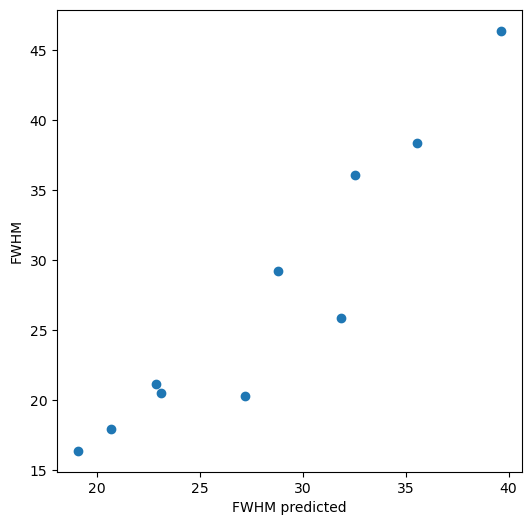

y = ax + b
(a = 1.4037305446101065, b = -12.259058209669151)
FWHM MSE:  25.310028683520088


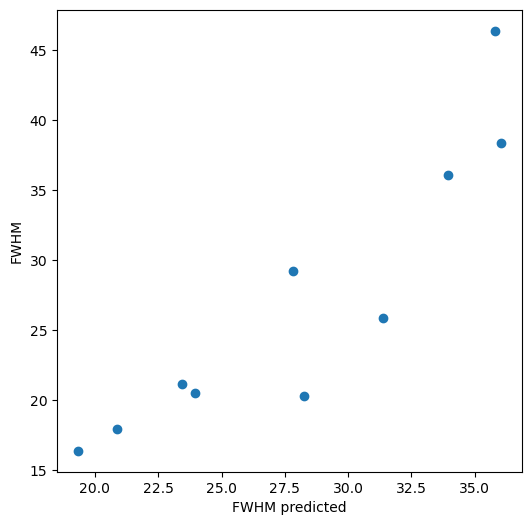

y = ax + b
(a = 1.4947268312363557, b = -14.751576078793928)
FWHM MSE:  15.925326096960044


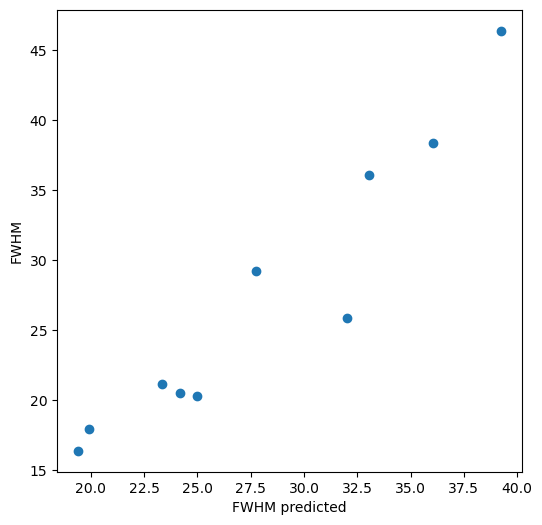

y = ax + b
(a = 1.4075202413624046, b = -12.182870701719043)
FWHM MSE:  21.065154230880076


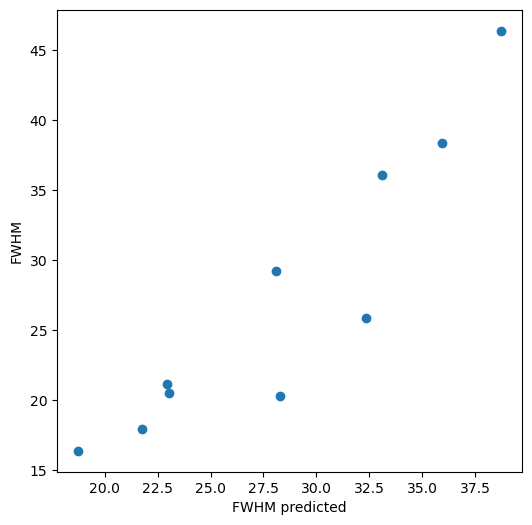

y = ax + b
(a = 1.3978258238460517, b = -12.321655191996802)
FWHM MSE:  16.769949359040048


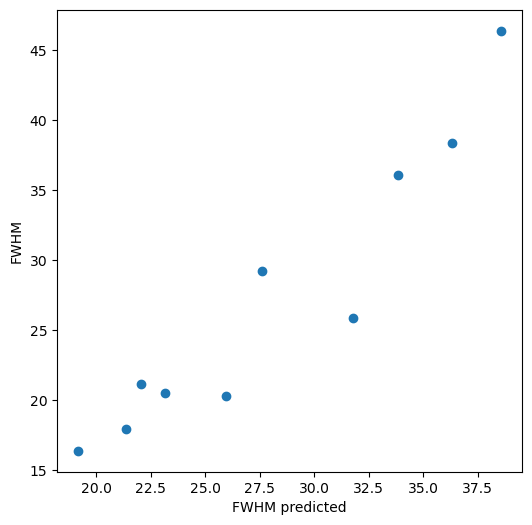

y = ax + b
(a = 1.404219225017049, b = -12.074082418454502)
FWHM MSE:  22.41605145600009


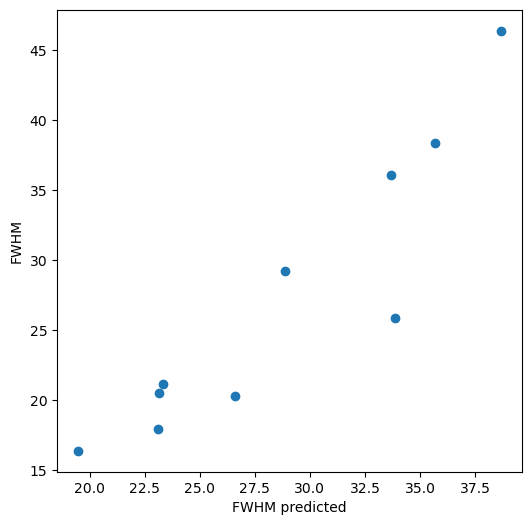

y = ax + b
(a = 1.4291729339100734, b = -13.709568983572886)
FWHM MSE:  22.336867890720054


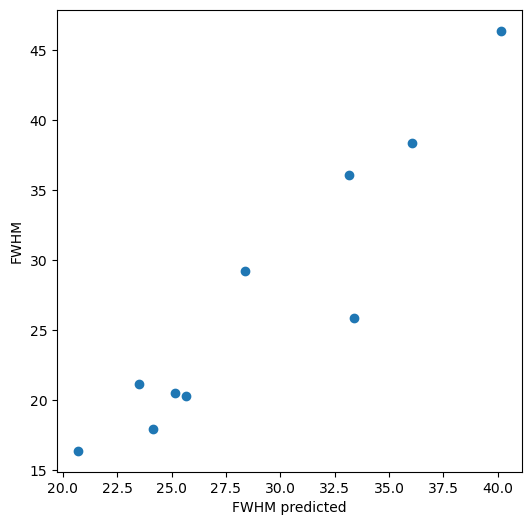

y = ax + b
(a = 1.4992766090299559, b = -16.302786738508313)
FWHM MSE:  20.91787641504007


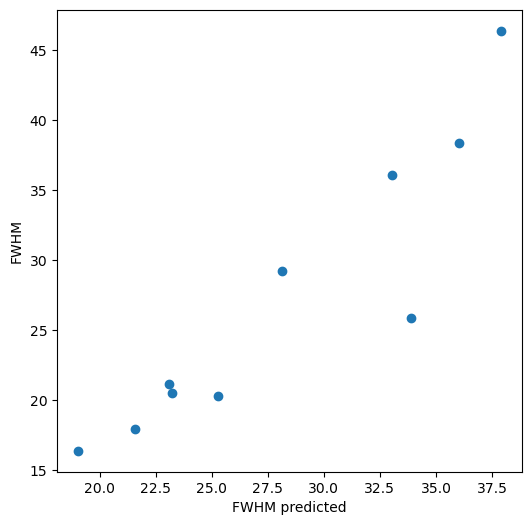

y = ax + b
(a = 1.3907983161528015, b = -11.898605391372802)
FWHM MSE:  18.674741743200066


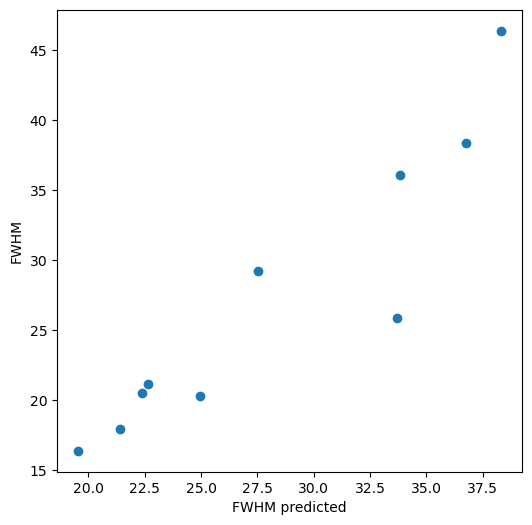

y = ax + b
(a = 1.3445525237984803, b = -10.567913879026223)
FWHM MSE:  24.637365725760073


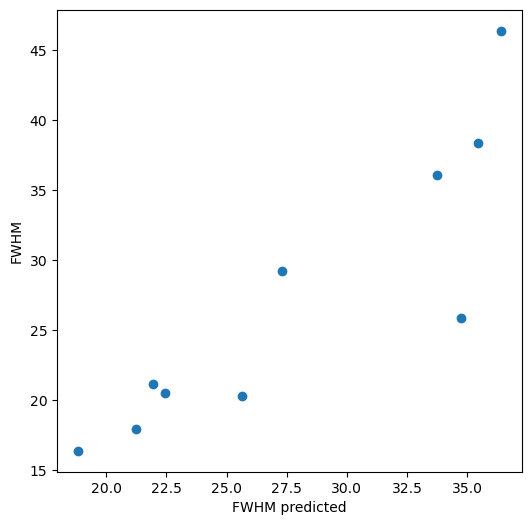

y = ax + b
(a = 1.3191435221255436, b = -9.422091316858582)


In [27]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=1) #X,YをAIに学習させるデータと、テスト用のデータに分ける

    RF= RandomForestRegressor()
    RF.fit(X_train, Y_train)
    RF.fit(X, Y)

    Y_test_pred  = RF.predict(X_test)

    MSE=mean_squared_error(Y_test,Y_test_pred)
    a,b=np.polyfit(Y_test_pred,Y_test,1) #linear approximation
    print(ans+" MSE: ",MSE)


    plt.figure(figsize=(6,6))
    plt.scatter(Y_test_pred,Y_test)
    plt.xlabel(ans+" predicted")
    plt.ylabel(ans)
    plt.show()
    print('y = ax + b\n' + '(a = ' + str(a) + ', b = ' + str(b) + ')')